# Project: Write a Data Science Blog Post 
Written by Maria Nuila

# Introduction: 
    The goal of this project is to go through the CRISP-DM methodology in data mining to structure business needs and prepare data to formulate a learning model for our data. 
    
# DataSet
    For our project we will be using a dataset from the company InsiderAirbnb. InsiderAirbnb scrapes multiple Airbnb listings from all over the world in order to better understand Airbnb business practices and features that lead to the multiple listings and pricing information available per county. 
    
# Part 1: Understanding Business Needs
    We will be working with the dataset of Clark County, NV to create a linear regression model to predict price for Airbnb's listing. The data used for this analysis was scraped in December 2020. The questions I will be focused on for this data mining process are: 
        1. What features of amnenties lead to variation of price per listing?
        2. Which types of reviews determine price of a listing? Is it valuable to be a superhost?
        3. Is price merely determined by the size of the listing (the # of bedrooms, the # of people the listing accomodates)?
        4. Does the room type influence price?

# Data Understanding:
    We will overlook what our data features are and understand the quality of our data

In [3]:
#Import our required libraries: 
Does the room type influence price?
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import warnings
%matplotlib inline

raw_df = pd.read_csv('./listings_dec_nv.csv')

raw_df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,31388,https://www.airbnb.com/rooms/31388,20201221133939,2020-12-21,Las Vegas MGM Signature Condo,This place is perfect in all respects: Excelle...,Quiet. Smoke free environment. Next to MGM Gra...,https://a0.muscache.com/pictures/175948/05b3fe...,134746,https://www.airbnb.com/users/show/134746,...,10.0,10.0,9.0,NaN,f,1,0,1,0,0.05
1,41656,https://www.airbnb.com/rooms/41656,20201221133939,2020-12-21,#TOP Floor 2BR/3BA Penthouse @MGMSig,"°º¤ø,¸¸,ø¤º° 38TH Floor º¤ø,¸¸,ø¤º°`°º¤ø<br />...",NaN,https://a0.muscache.com/pictures/1755899/4efda...,181985,https://www.airbnb.com/users/show/181985,...,10.0,10.0,10.0,NaN,t,6,5,1,0,0.54
2,44495,https://www.airbnb.com/rooms/44495,20201221133939,2020-12-21,Bedroom with private bath in Southwest Las Vegas,Upstairs Bedroom near loft in large home. Pri...,Very quiet neighborhood in the edge of the des...,https://a0.muscache.com/pictures/863273/9d5875...,195560,https://www.airbnb.com/users/show/195560,...,10.0,9.0,10.0,NaN,f,2,0,2,0,0.38
3,44701,https://www.airbnb.com/rooms/44701,20201221133939,2020-12-22,"Las Vegas Strip, 3 beds/sleep 6 cheaper than h...","Furnished Vila. Holiday Inn Desert Club, One b...",This 19.5-acre gated community is 1 block from...,https://a0.muscache.com/pictures/1218626b-295f...,189245,https://www.airbnb.com/users/show/189245,...,10.0,10.0,9.0,NaN,f,1,1,0,0,0.04
4,61643,https://www.airbnb.com/rooms/61643,20201221133939,2020-12-21,2BR/2BA Strip View@MGM Signature,"<b>The space</b><br />°º¤ø,¸¸,ø¤º° 17TH Floor ...",NaN,https://a0.muscache.com/pictures/1252665/27496...,181985,https://www.airbnb.com/users/show/181985,...,10.0,10.0,10.0,NaN,f,6,5,1,0,1.00


We have ~73 features for each of our datasets. We will not be utilizing all 73 as we are looking at specific features to create our price prediction model. We will then drop the columns we will not be using to further explore our dataset, which are not useful in predicting price of a listing. 

In [4]:
cols_to_drop = [ 'listing_url', 'scrape_id', 'last_scraped', 'name','description','picture_url', 'host_id', 'host_url', 'host_name',
               'host_since', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 
               'host_total_listings_count', 'latitude', 'longitude', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
               'calendar_updated', 'calendar_last_scraped', 'first_review', 'last_review', 'license']

df = raw_df.drop(cols_to_drop, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9617 entries, 0 to 9616
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9617 non-null   int64  
 1   neighborhood_overview                         5517 non-null   object 
 2   host_response_time                            8541 non-null   object 
 3   host_response_rate                            8541 non-null   object 
 4   host_acceptance_rate                          9014 non-null   object 
 5   host_is_superhost                             9609 non-null   object 
 6   host_neighbourhood                            3295 non-null   object 
 7   host_listings_count                           9609 non-null   float64
 8   host_verifications                            9617 non-null   object 
 9   host_has_profile_pic                          9609 non-null   o

We want to understand the quality of our data, so we will see the count of null values of set features

In [5]:
missing_vals = df.isnull().sum()

#We would like to understand the percentage of values missing 
missing_vals /= df.shape[0]
missing_vals *=100

#Create a nice box to display 
missing_vals = missing_vals.to_frame().rename(columns={0: 'Percent of Missing Values'})
#Display our missing values:
missing_vals

,Percent of Missing Values
id,0.000000
neighborhood_overview,42.632838
host_response_time,11.188520
host_response_rate,11.188520
host_acceptance_rate,6.270147
host_is_superhost,0.083186
host_neighbourhood,65.737756
host_listings_count,0.083186
host_verifications,0.000000
host_has_profile_pic,0.083186


In [6]:
df.shape

(9617, 50)

We can see large portion of Airbnb listings do not have reviews (in all types). This could be because some of these listings have no sales yet, or very minimal. We may want to consider dropping some of these, as the price for these listings may not model what the consumer will actually pay. We may ignore further the neighboorhood info, as well as specific room features because many listings out of the total do not have any information. 

# Exploring the Data and Preprocessing

    We will explore our data further by looking at some of the features vs. price to see if we can predict a relationship between the two.

In [7]:
#We can observe our price is an object type, we will have to make the price numerical float
df['price'].dtypes

dtype('O')

We have already observed from our null analysis that price has no null values, so we just need to change our data type from an object to a float for our plot analyis. 

In [8]:
#clean our price dataframe 

#Remove $ from our values: 
df.price = df['price'].str.replace('$','')

#Now we can change our dtype of our price to be a float
df['price'] = pd.to_numeric(df['price'], errors='coerce')

#lets confirm our price is now a float:
df.price.dtypes

dtype('float64')

### Describe Numerical Features 

In [9]:
df.describe()

,id,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,9.617000e+03,9609.000000,9617.000000,0.0,8766.000000,9522.000000,9479.000000,9617.000000,9617.000000,9617.000000,...,6933.000000,6932.000000,6933.000000,6932.000000,6932.000000,9617.000000,9617.000000,9617.000000,9617.000000,7014.000000
mean,3.276075e+07,114.075034,5.246751,NaN,1.981748,2.743751,171.891997,7.585422,560.295206,7.283976,...,9.515361,9.723601,9.723929,9.656665,9.501154,26.447437,16.566185,2.877405,0.079547,1.667633
std,1.213928e+07,372.584139,3.235480,NaN,1.320559,2.231407,146.415726,16.730367,544.151911,16.471366,...,1.006873,0.868036,0.869566,0.859723,0.983120,54.799623,37.192782,8.726338,0.561166,1.822709
min,3.138800e+04,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.339834e+07,1.000000,3.000000,NaN,1.000000,1.000000,75.000000,1.000000,29.000000,1.000000,...,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.000000,0.000000,0.000000,0.280000
50%,3.585772e+07,5.000000,4.000000,NaN,2.000000,2.000000,128.000000,2.000000,365.000000,2.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000,2.000000,0.000000,0.000000,1.000000
75%,4.343075e+07,27.000000,7.000000,NaN,2.000000,4.000000,216.000000,4.000000,1125.000000,3.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,17.000000,10.000000,2.000000,0.000000,2.500000
max,4.716326e+07,2470.000000,16.000000,NaN,17.000000,30.000000,999.000000,500.000000,9999.000000,500.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,263.000000,178.000000,62.000000,9.000000,22.370000


<b> Question:</b> What is the distribution of price througout all the listings found in Nevada?

/Users/MariaNuila/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


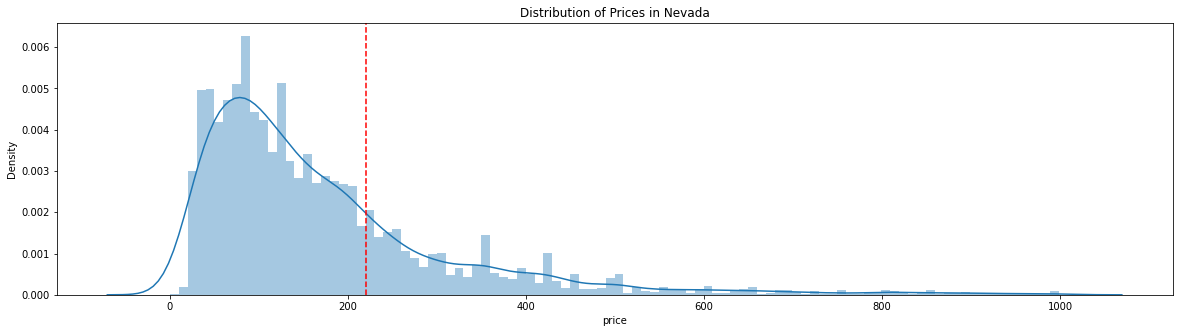

In [10]:
plt.figure(figsize=(20,5))
axes = sns.distplot(df['price'], bins=100)
axes.set_title("Distribution of Prices in Nevada")
axes.axvline(220, color = "red", linestyle='--')

The highest density of our prices is distributed between 0-220 dollars or so. The pricing fluctuations in price we observe beyond 400 dollars to be fairly uncommon. We will continue our exploration of price by comparing the price with the listing's ability to accomodate more people, and the listing room type.

### Looking at Price and Accommodation

Text(0.5, 1.0, 'Price vs Accommodation looking at the Room Type')

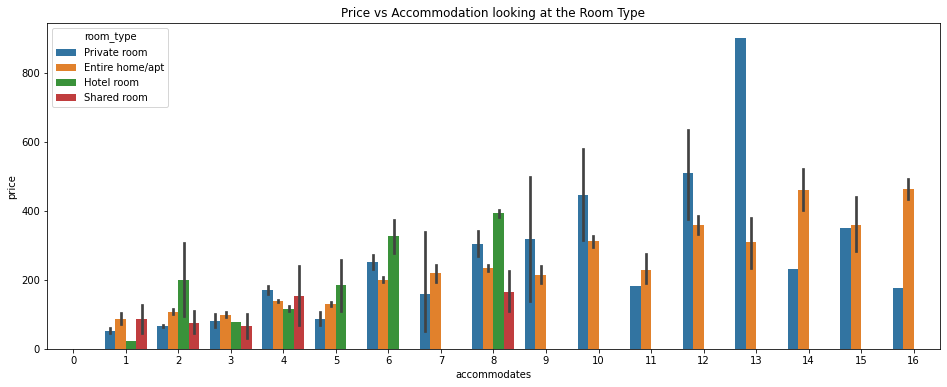

In [11]:
plt.figure(figsize=(16,6))
axes_bar = sns.barplot(x='accommodates', y='price', data = df, hue='room_type')
axes_bar.set_title("Price vs Accommodation looking at the Room Type")

Text(0.5, 1.0, 'Accommodation vs Price')

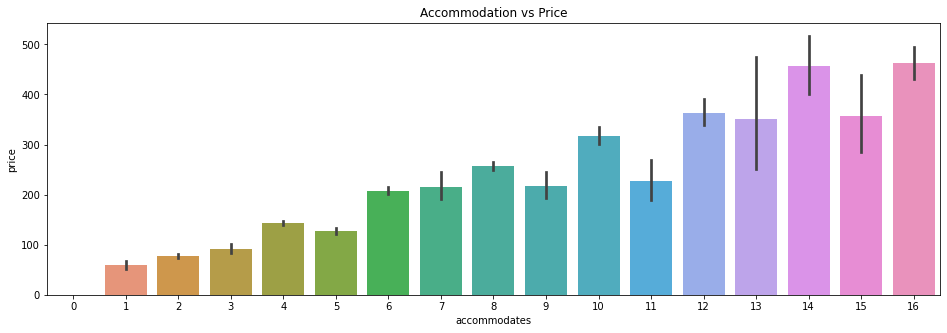

In [12]:
plt.figure(figsize=(16,5))
ax = sns.barplot(x='accommodates', y = 'price', data = df)
ax.set_title("Accommodation vs Price")

Generally, we can observe that as the listing accommodates more people, the prices generally increase. However, there are dips at accomodations of 11, 13, 15, people. When we are comparing it with the room type we see that the private room and entire home is extremely variant when the listing accommodates more people (around 11- 16). More than likely the listings and room type are not accurately labeled all the time. It would be valuable to understand the variation due to the number of bedroms and beds because some listings may accomodate a lot of people with few beds or bedrooms providing perhaps a foldable bed or couches to sleep on. 

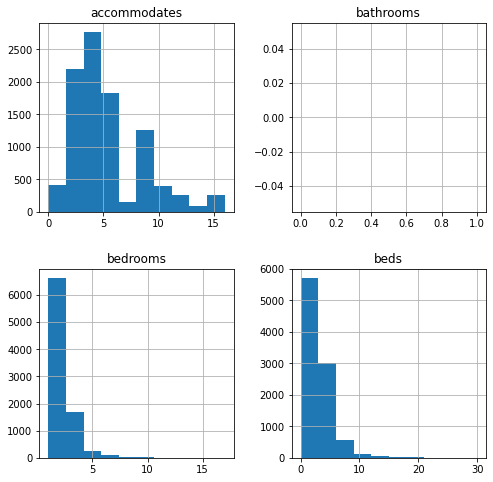

In [13]:
df[['accommodates', 'bathrooms', 'bedrooms', 'beds']].hist(figsize=(8,8));

Below we will evaluate how many of our listings do not provide the acoomodation bathrooms or bedroom information

In [14]:
df['bathrooms'].isnull().sum()

9617

In [15]:
df['accommodates'].isnull().sum()

0

In [16]:
df['bedrooms'].isnull().sum()

851

In [17]:
df['beds'].isnull().sum()

95

So, out of all these features of a listing, the one with least missing values would be the number of beds per listing. So, lets see how price changes with the number of beds provided, with a look also of the # of accommodations.

Text(0.5, 1.0, 'Beds vs Price')

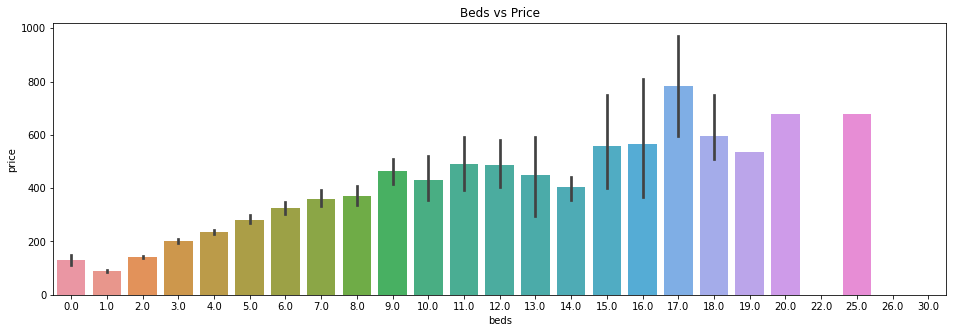

In [18]:
plt.figure(figsize=(16,5))
ax = sns.barplot(x='beds', y = 'price', data = df)
ax.set_title("Beds vs Price")

We can see a positive correlation between the number accomodated and the number of beds and price. However, there are some variations bas we go beyond 7 beds and price, where we see some dips in the data values. Again, we shall try to explore our data further to understand what other determining factors can cause these fluctuations in price. 

## Neighborhood information 
<div> We will now explore the neighborhood information. </div>

In [19]:
df.neighbourhood.value_counts()

Las Vegas, Nevada, United States           4923
Henderson, Nevada, United States            280
North Las Vegas, Nevada, United States      219
Mesquite, Nevada, United States              25
Boulder City, Nevada, United States          11
Enterprise, Nevada, United States            10
Las Vegas , Nevada, United States             9
Laughlin, Nevada, United States               8
Paradise, Nevada, United States               5
Mount Charleston, Nevada, United States       5
las vegas, Nevada, United States              3
Sandy Valley, Nevada, United States           3
Moapa Valley, Nevada, United States           2
拉斯维加斯, Nevada, United States                  2
Spring Valley, Nevada, United States          2
Henderson , Nevada, United States             2
Las Vegas , Nv, United States                 1
Las Vega , Nevada, United States              1
LAS VEGAS, Nevada, United States              1
lake las vegas, Nevada, United States         1
Las vega , Nevada, United States        

Before we can accurately view this data with price we will have to clean the neighborhood data up.

In [20]:
#Define length which will be used later
n_length = df['neighbourhood'].shape[0]

#possible values that will relabel our df
city_possible_vals = ["Las Vegas", "Henderson", "Mesquite", "Boulder City", "Enterprise",
                      "Lauglin", "Mount Charleston", "Paradise", "Sandy Valley", 
                      "Spring Valley", "Moapa Valley", "Bullhead City", "Searchlight", 
                      "Sunrise Manor", "Lake Las Vegas"]



In [21]:
def clean_neighbourhood_data(data, new_labels, length):
    """
    """
    for idx in range(0, length):
        neighbour_val = data['neighbourhood'][idx]
        if isinstance(neighbour_val, float) and math.isnan(neighbour_val):
            data['neighbourhood'][idx] = "Some Nevada City"
        else:
            for val in city_possible_vals:
                if "las vega" in neighbour_val.lower():
                    data['neighbourhood'][idx] = "Las Vegas"
                    break
                if neighbour_val == "拉斯维加斯, Nevada, United States":
                    data['neighbourhood'][idx] = "Las Vegas"
                    break
                if val.lower() in neighbour_val.lower():
                    data['neighbourhood'][idx] = val
                    break
                    

In [22]:
clean_neighbourhood_data(df, city_possible_vals, n_length)

warnings.filterwarnings('ignore')

/Users/MariaNuila/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/MariaNuila/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/MariaNuila/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kern

In [23]:
df.neighbourhood.value_counts()

Las Vegas                          5161
Some Nevada City                   4100
Henderson                           282
Mesquite                             25
Boulder City                         11
Enterprise                           10
Laughlin, Nevada, United States       8
Mount Charleston                      5
Paradise                              5
Sandy Valley                          3
Spring Valley                         2
Moapa Valley                          2
Sunrise Manor                         1
Searchlight                           1
Bullhead City                         1
Name: neighbourhood, dtype: int64

After cleaning up our labels here, we imputted some values for null and set it as "some nevada city" since the host did not describe where exactly the listing is found. Because the value of nulls is so high in comparison out of the totals, we may not use the neighbourhood feature for our learning model. 

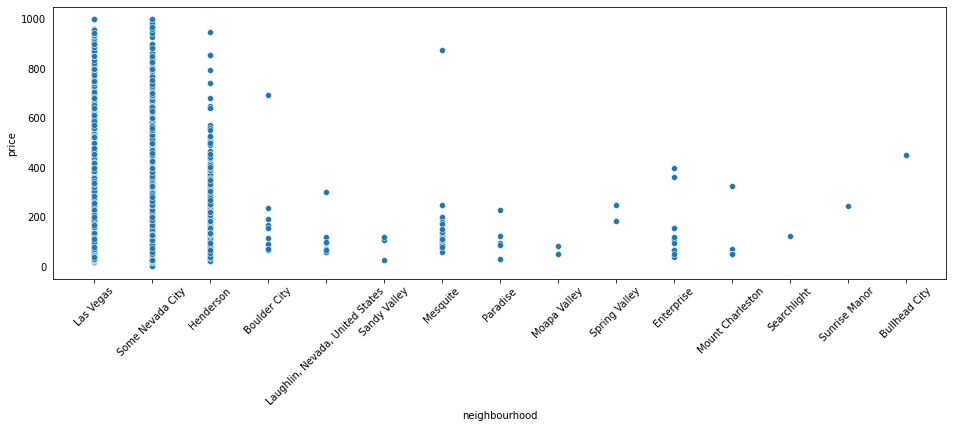

In [24]:
plt.figure(figsize=(16,5))
ax = sns.scatterplot(x='neighbourhood', y = 'price', data = df, ci= False)
plt.xticks(rotation=45)
ax.tick_params(left=False)

Because of the inputted neighbourhood values as "some nevada city" its hard to truly describe the neighbourhood as a determining factor in price. Considering the high value of nulls, we will drop this column further in developing our learning model as it does not give us a positive nor negative correlation to price determination. 

## Reviews information

First we will review the Review Scores Accuracy. 
<i> Review Scores Accuracy </i> is defined by AirBnb as "how accurately did the listing page represent the space? For example, guests should be able to find up-to-date info and photos in the listing description." For instance, if a listing says it provides 5 beds, then there are 5 beds present within the listing. After we will compare this review score with the overall <i> Review Score Rating </i> that describes the overall stay of the listing. 

In [25]:
#percentage of null values 
null_count =df.review_scores_accuracy.isnull().sum()
total_count = df.review_scores_accuracy.shape[0]
percentage_of_null = ( null_count / total_count ) * 100.0
print('Percentage of null: ', percentage_of_null)

Percentage of null:  27.908911302901114


Before, we looked at this percentage of null values for all the reviews columns. We observed all reviews shared the same amount of missing values. A possible explanation for this these listings are relatively new, or perhaps still have not be rented out or the price listed is too high. We can drop these null values to ensure no skewing of data occurs with listed price, and actual price observed when listed is booked. 

In [26]:
#Drop the null values before exploring our data
df = df[df['review_scores_accuracy'].notna()]

In [27]:
#verify no null values
df['review_scores_accuracy'].isnull().sum()

0

Text(0.5, 1.0, 'Review Score Location and Price')

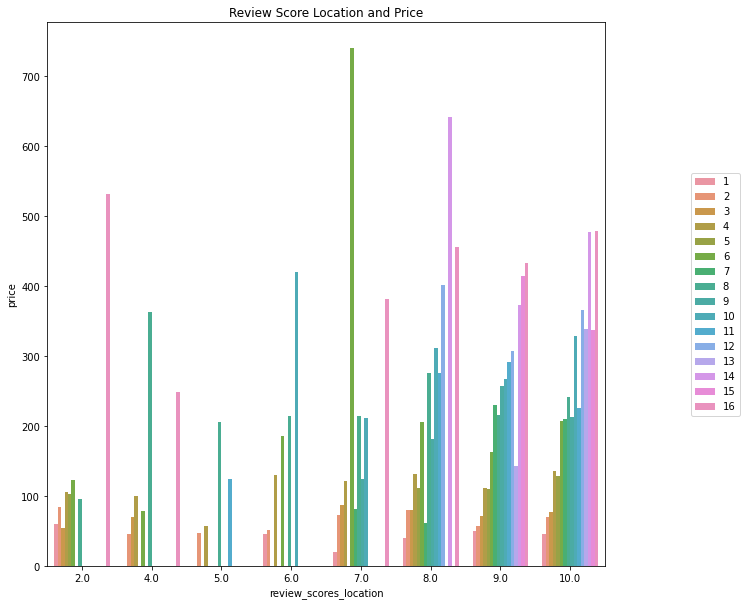

In [28]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x='review_scores_location', y='price', data = df,ci=False, hue='accommodates')
# Put a legend to the right side
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
ax.set_title("Review Score Location and Price")

Text(0.5, 1.0, 'Review Scores Accuracy vs. Price Looking at Accomodation')

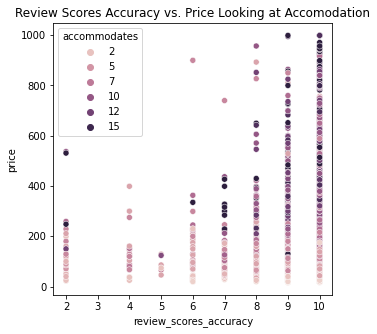

In [29]:
plt.figure(figsize=(5,5))
ax = sns.scatterplot(x='review_scores_accuracy', y ='price', data= df, hue='accommodates')
ax.set_title("Review Scores Accuracy vs. Price Looking at Accomodation")

Text(0.5, 1.0, 'Review Score Accuracy and Price')

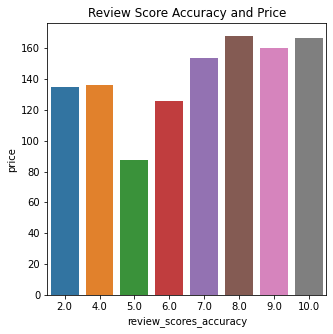

In [30]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x='review_scores_accuracy', y='price', data = df,ci=False)
ax.set_title("Review Score Accuracy and Price")

Text(0.5, 1.0, 'Review Scores Rating vs. Price Looking at Accomodation')

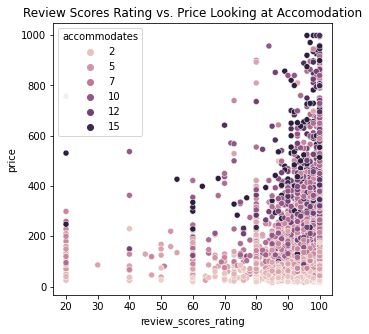

In [31]:
plt.figure(figsize=(5,5))
ax = sns.scatterplot(x='review_scores_rating', y ='price', data= df, hue = 'accommodates')
ax.set_title("Review Scores Rating vs. Price Looking at Accomodation")

Text(0.5, 1.0, 'Review Score Rating and Price')

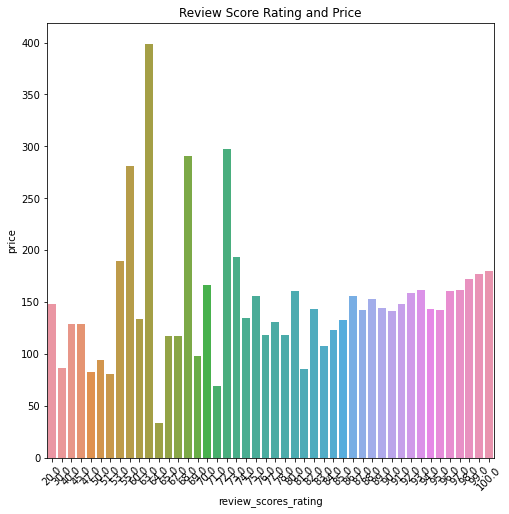

In [32]:
plt.figure(figsize=(8,8))
plt.xticks(rotation=45)
ax = sns.barplot(x='review_scores_rating', y='price', data = df,ci=False)
ax.set_title("Review Score Rating and Price")

We see a positive correlation between price, accommodation, and review score rating for accuracy and overall. However, when looking purely price and review scores rating in the final bar plot we can see that perhaps reviews alone is not a determining factor of whether the price listing will be high or not. 

### Property Type

We will know explore the property_type information, to better understand its relationship to the price of a listing. 

In [33]:
#We will create a dictionary to better understand the property type values since there are many
property_type = {}
for idx, value in enumerate(df['property_type'].value_counts().index.tolist()):
    property_type[value] = df['property_type'].value_counts()[idx]
    
print(property_type)

{'Entire condominium': 1644, 'Entire house': 1492, 'Private room in house': 1025, 'Entire apartment': 761, 'Entire serviced apartment': 423, 'Private room in resort': 270, 'Room in hotel': 158, 'Private room in apartment': 137, 'Entire townhouse': 130, 'Entire villa': 115, 'Entire guest suite': 108, 'Private room in condominium': 107, 'Entire guesthouse': 76, 'Private room in townhouse': 48, 'Private room in villa': 42, 'Room in aparthotel': 39, 'Room in boutique hotel': 37, 'Private room in bungalow': 35, 'Private room in guest suite': 34, 'Entire loft': 26, 'Entire bungalow': 26, 'Room in serviced apartment': 20, 'Room in resort': 19, 'Shared room in house': 18, 'Entire resort': 15, 'Private room in bed and breakfast': 13, 'Tiny house': 12, 'Shared room in apartment': 9, 'Camper/RV': 9, 'Shared room in condominium': 8, 'Entire place': 7, 'Private room in guesthouse': 7, 'Private room in farm stay': 5, 'Private room': 4, 'Private room in tiny house': 4, 'Room in hostel': 4, 'Private r

In [151]:
df.groupby(['property_type']).mean()['price'].sort_values()

property_type
Shared room in villa                  18.000000 
Shared room                           20.000000 
Private room in dome house            22.000000 
Private room in tent                  22.250000 
Room in hostel                        26.000000 
Private room in farm stay             33.600000 
Private room in tiny house            41.000000 
Private room in treehouse             42.000000 
Private room in bungalow              52.314286 
Private room in earth house           54.500000 
Private room in house                 55.092773 
Private room in apartment             55.191176 
Private room in guesthouse            55.285714 
Private room in guest suite           55.617647 
Farm stay                             60.000000 
Private room in bed and breakfast     60.307692 
Private room in townhouse             61.791667 
Shared room in house                  64.222222 
Shared room in guest suite            64.500000 
Private room in villa                 67.809524 
Entire

<b> Question: Can estimate the price based on property_type information? </b>
<b> Answer: </b> Yes, we can see that the listings that have a "shared" type will be much lower than say a listing that has an "entire" within the description. It was interesting to notice the barn had the highest price for the property types.

Text(0.5, 1.0, 'Property Type and Price')

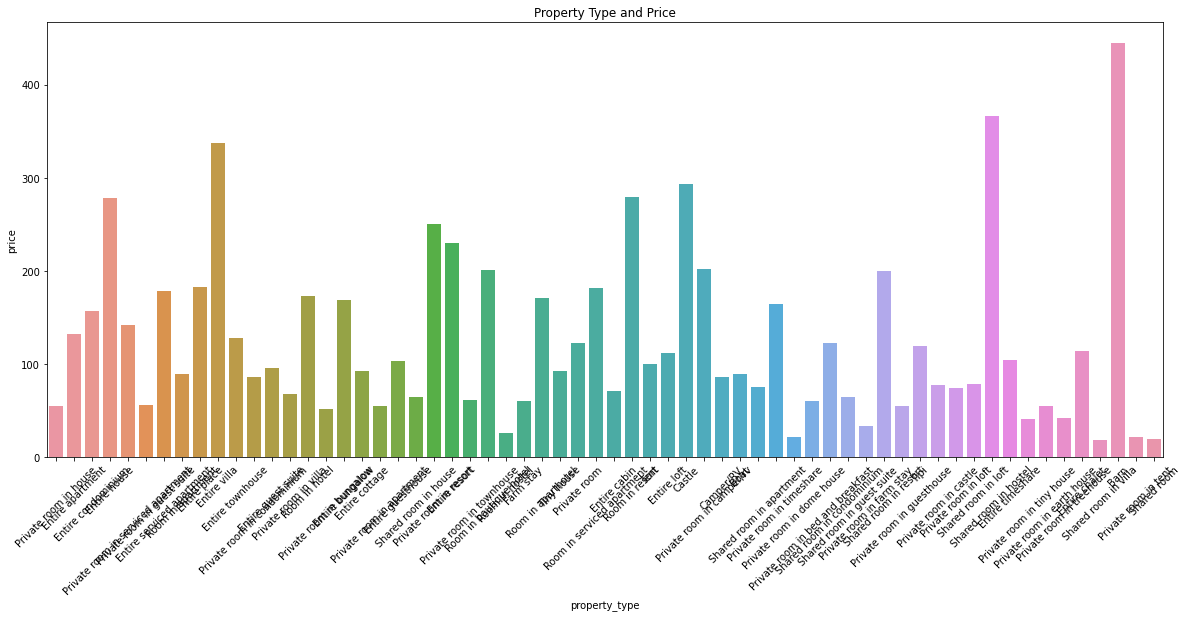

In [153]:
#Let's look at this graphically:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
ax = sns.barplot(x='property_type', y='price', data = df,ci=False)
ax.set_title("Property Type and Price")

### Exploring Host Information

Know we will be exploring the host information of a listing.

In [35]:
df['host_is_superhost'].value_counts()

f    4023
t    2908
Name: host_is_superhost, dtype: int64

<b> Question: </b> Does being a super host contribute to a listing having higher price?

Text(0.5, 1.0, 'Host is Superhost vs Price')

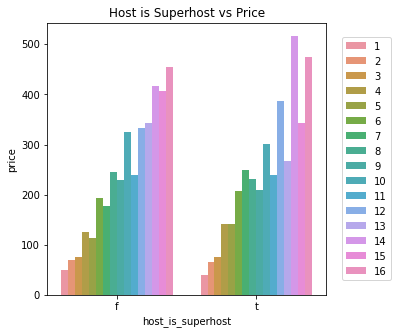

In [178]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x="host_is_superhost", y="price", data=df, ci=False, hue='accommodates')
# Put a legend to the right side
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
ax.set_title('Host is Superhost vs Price')

<b> Answer </b> Looking at the barplot above we notice that when matching the number a listing accommodates and whether or not the host is a super host that the price is only sometimes relatively larger. By this graph alone, we cannot say that being a super host will contribute to a higher price. For instance, when we see the value accommodates=9 is a little lower for a listing that is a super host.

#### Does the superhost have a good acceptance rate or response rate?

In [37]:
#clean our host acceptance rate dataframe 

#Remove $ from our values: 
df.host_acceptance_rate = df['host_acceptance_rate'].str.replace('%','')

#Now we can change our dtype of our price to be a float
df['host_acceptance_rate'] = pd.to_numeric(df['host_acceptance_rate'], errors='coerce')

#lets confirm our price is now a float:
df.host_acceptance_rate.dtypes

dtype('float64')

Text(0.5, 1.0, 'Host is superhost vs Host Acceptance Rate Looking at Price')

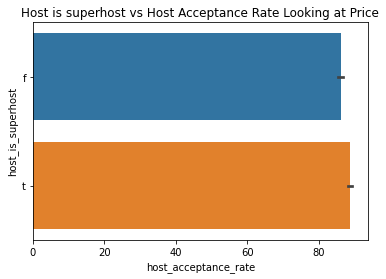

In [156]:
ax = sns.barplot(x='host_acceptance_rate', y='host_is_superhost', data=df)
ax.set_title('Host is superhost vs Host Acceptance Rate Looking at Price')

<b> Answer </b> Looking at the barplot, we can see that being a super host is not indicative of whether the host will have a higher response rate or not. 

In [39]:
#clean our host acceptance rate dataframe 

#Remove $ from our values: 
df.host_response_rate = df['host_response_rate'].str.replace('%','')

#Now we can change our dtype of our price to be a float
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'], errors='coerce')

#lets confirm our price is now a float:
df.host_response_rate.dtypes

dtype('float64')

<b> Question </b> Does being a superhost imply a host has more lsitings?

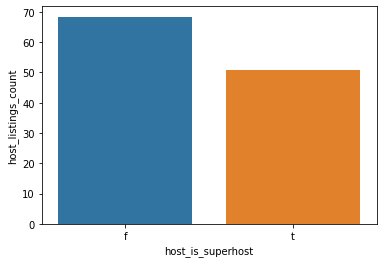

In [40]:
ax = sns.barplot(x='host_is_superhost', y='host_listings_count', data=df, ci=False)

<b> Answer </b> From the scatterplot above we can see that generally being a super host is not indicative of how many listings one has. The count is much higher for hosts that are not super hosts.

Generally, the superhost label doesn't give us a good predictive value for price or whether a host will have multiple listings or perhaps a high acceptance rate. 

## Checking Out Amenities Data:
We will overview the amenities column to understand the level to which listings provide some, and to which extent these relate to overall price of a listing. We will have to organize this data, and later provide some categorical conversion to numerical values for our learning model. 

In [41]:
#Create a list format of the data frame column amenities: 
amenities_list = list(df.amenities)

In [42]:
print(amenities_list[2])

["Wifi", "Washer", "Conditioner", "Bed linens", "Garden or backyard", "Carbon monoxide alarm", "Smoke alarm", "Hangers", "Portable fans", "Hot water", "TV", "Luggage dropoff allowed", "Dishes and silverware", "Iron", "Microwave", "Coffee maker", "Host greets you", "Extra pillows and blankets", "Air conditioning", "Dryer", "Heating", "Cable TV", "BBQ grill", "Shampoo", "Long term stays allowed", "Free street parking", "Body soap", "Ceiling fan", "Lock on bedroom door", "Essentials"]


In [43]:
def clean_amenities_list(amenities_lst):
    """
    INPUT
        amenities_lst - a list value of a list of amenities
    
    OUTPUT
        returns a list value amenities_separate where the amenities have been separated in a cleaner format
    """
    #Lets make the list into a string to set up our set
    amenities_string_list = " ".join(amenities_lst)
    #Replace {} " characters appropriately to split our string into a set
    amenities_string_list = amenities_string_list.replace('[', '')
    amenities_string_list = amenities_string_list.replace('"', '')
    amenities_string_list = amenities_string_list.replace(']', ',')
    #Now lets separate each individual amenities
    amenities_separated = [x.strip() for x in amenities_string_list.split(',')]
    return amenities_separated
amenities_sep = clean_amenities_list(amenities_list)

#Lets create our set
amenities_set = set(amenities_sep)
amenities_set

{'',
 '2-burner cooktop electric stove',
 '2-burner induction cooktop induction stove',
 '32\\ HDTV with standard cable',
 '32\\ TV with Amazon Prime Video',
 '40\\ HDTV with Amazon Prime Video',
 '42\\ HDTV with premium cable',
 '42\\ HDTV with standard cable',
 '43\\ HDTV with Amazon Prime Video',
 '43\\ HDTV with standard cable',
 '45\\ HDTV with Netflix',
 '50\\ HDTV with Netflix',
 '50\\ HDTV with standard cable',
 '52\\ HDTV with Netflix',
 '55\\ HDTV with Amazon Prime Video',
 '55\\ HDTV with Netflix',
 '55\\ HDTV with Roku',
 '55\\ HDTV with standard cable',
 '58\\ TV with Netflix',
 '60\\ HDTV with Netflix',
 '64\\ HDTV with Netflix',
 '65\\ HDTV with Netflix',
 '65\\ HDTV with premium cable',
 '65\\ HDTV with standard cable',
 '65\\ TV with Netflix',
 '86\\ HDTV with Netflix',
 'Air conditioning',
 'Alexa connected to lights and tv sound system',
 'Amana refrigerator',
 'Amana stainless steel electric stove',
 'Amana stainless steel oven',
 'Amazon Prime Video',
 'Aussie cond

In [99]:
def clean_amenities_string(amenities_lst):
    #Lets make the list into a string to set up our set
    amenities_string_list = " ".join(amenities_lst)
    #Replace {} " characters appropriately to split our string into a set
    amenities_string_list = amenities_string_list.replace('[', '')
    amenities_string_list = amenities_string_list.replace('"', '')
    amenities_string_list = amenities_string_list.replace(']', ',')
    amenities_string_list = amenities_string_list.replace(" ", '')
    amenities_string_list = amenities_string_list.replace(",", ' ')
    return amenities_string_list


cleaned = clean_amenities_string(df.amenities[11])
clean_lst = cleaned.lower().split()
print(clean_lst)
bbq_activities = "bbqgrill | firepit | barbeque"
for amen in clean_lst:
    if amen in bbq_activities:
        print(amen)

['wifi', 'washer', 'showergel', 'bedlinens', 'cookingbasics', 'gardenorbackyard', 'carbonmonoxidealarm', 'smokealarm', 'hangers', 'hotwater', 'tv', 'refrigerator', 'dishesandsilverware', 'kitchen', 'iron', 'stove', 'microwave', 'oven', 'bakingsheet', 'coffeemaker', 'extrapillowsandblankets', 'crib', 'dishwasher', 'airconditioning', 'dryer', 'heating', 'cabletv', 'pool', 'dedicatedworkspace', 'bbqgrill', 'shampoo', 'freeparkingonpremises', 'longtermstaysallowed', 'freestreetparking', 'essentials', 'ethernetconnection', 'indoorfireplace', 'patioorbalcony', 'fireextinguisher', 'highchair', 'firstaidkit', 'barbecueutensils', 'hairdryer', 'privateentrance']
bbqgrill


In [45]:
df['amenities'].isna().any()

False

We will have to deduce which amenitites will likely lead to an increase in price. Obviously some amenities above we notice are repetitive due to spelling errors or even '/' slashes found in the name or variations of name descriptions for the same item. 

The <b> amenities </b> that will be chosen are: 
<ul> HDTV with standard cable, Amazon Prime Video, Netflix, Roku,  Chromecast, HBO Max, Game Console </ul>
<ul> Air conditioning </ul>
<ul> BBQ Grill, Fire pit,  </ul>
<ul> Beachfront, Lake access </ul>
<ul> Bikes </ul>
<ul> Breakfast </ul>
<ul> Dishwasher, Dryer, Washer and Dryer, Free washers  </ul>
<ul> Elevator </ul> 
<ul> EV charger </ul>
<ul> Indoor fireplace </ul>
<ul> Free driveway parking on premises </ul>
<ul> Free residential garage on premises </ul>
<ul> Gym, Shared gym nearby </ul>
<ul> Host greets you </ul>
<ul> Hot tub, Private hot tub, Shared hot tub  </ul>
<ul> Keurig coffee machine, Nespresso machine, Pour-over coffee </ul>
<ul> Lock on bedroom door, Lockbox, Smart lock </ul>
<ul> Outdoor furniture, outdoor dining area </ul> 
<ul> Patio or balcony, Garden or backyard </ul>
<ul> Pool, Private outdoor pool, Shared outdoor heated pool, shared outdoor pool </ul>
<ul> Pool table, Ping pong table, Piano </ul> 
<ul> Private entrance, Private fenced garden or backyard, Private living room </ul> 
<ul> Pocket wifi, Wifi </ul>
<ul> Baby bath, Baby monitor, Baby safety gates, Babysitter recommendations, Board games, Changing table,
    Childrens books and toys, Childrens dinnerware, Crib, High chair </ul>
    


In [46]:
#Here we will create new labels for listings that have these ameneties:
electronic_entertainment = "amazonprime | netflix | cabletv | roku | hbo | gameconsole | chromecast | premiumcable | cable"
air_conditioning = "ac | airconditioning | a/c"
bbq_activities = "bbqgrill | firepit | barbeque"
parking_available = "freeparking | freeresidentialgarageonpremises | freedrivewayonpremises | valetparking | freeparkingonpremises"
washer_dryer_avail = "dryer | washer | diswasher | washeranddryer | freewasher"
outdoor_nature = "lakeaccess | beachfront | beach"
internet_available = "wifi | internet | pocketwifi"
outdoor_dining = "outdoorfurniture | outdoordiningarea"
pool_available = "pool | privateoutdoorpool | sharedoutdoorheatedpool | sharedoutdoorpool | outdoorpool"
indoor_activities = "pooltable | pingpongtable | paino"
private_access = "privateentrance | privatelivingroom"
security_features = "smartlock | lockonbedroomdoor | lockbox"
outdoor_access = "privatedfencedgarden | backyardgarden | backyard | backyardpatioorbalcony"
coffee_maker = "keurigcoffeemachine  | nespressomachine | pour-overcoffee | coffee"
gym_available = "gym | sharedgym | nearby gym"
hot_tub_available = "hottub | privatehottub | sharedhottub | hottub"
travel_access = "bike | bikes | car | cars | evcharger | bicycle" 
breakfast_available = "breakfast"
fireplace_available = "fireplace | indoorfireplace"
host_present = "hostgreetsyou"
child_friendly = "babybath | babymonitor | babysafteygates | boardgames | changingtable | booksandtoys | childrensdinnerware |crib | highchair"
                     

In [47]:
boolean_dic = {'electronic_entertainment': 0, 'air_conditioning': 0, 'bbq_activities': 0, 'parking_available': 0, 'washer_dryer_available':0,
              'parking_available': 0, 'washer_dryer_avail':0,'outdoor_nature':0, 'internet_available':0, 'outdoor_dining':0, 'pool_available':0,
               'private_access': 0, 'security_features':0, 'outdoor_access':0, 'coffee_maker': 0, 'coffee_maker': 0, 'gym_available':0, 
               'hot_tub_available':0., 'travel_access': 0, 'breakfast_available': 0, 'fireplace_available': 0, 'host_present': 0, 'child_friendly':0}

In [100]:
#Our goal to create boolean values for each listing column for each of these either as true and false, then drop ameneties column
arr_bools = []
for lst_val in df.amenities:
    string_val = clean_amenities_string(lst_val)
    #lowercase our 
    string_list = string_val.lower().split()
    #create a copy of boolean dict for each amenities listing
    boolean_dic_c = boolean_dic.copy()
    for val in string_list:
    #check if the amenity is "important" and create a boolean dictionary and add it to our array list
        if val in electronic_entertainment:
            boolean_dic_c['electronic_entertainment'] = 1
        if val in air_conditioning:
            boolean_dic_c['air_conditioning'] = 1
        if val in bbq_activities:
            boolean_dic_c['bbq_activities'] = 1
        if val in parking_available: 
            boolean_dic_c['parking_available']=1
        if val in washer_dryer_avail:
            boolean_dic_c['washer_dryer_avail'] = 1
        if val in outdoor_nature:
            boolean_dic_c['outdoor_nature'] = 1
        if val in internet_available:
            boolean_dic_c['internet_available']=1
        if val in outdoor_dining:
            boolean_dic_c['outdoor_dining'] = 1
        if val in pool_available:
            boolean_dic_c['pool_available'] = 1
        if val in private_access:
            boolean_dic_c['private_access'] = 1
        if val in security_features:
            boolean_dic_c['security_features'] = 1
        if val in outdoor_access:
            boolean_dic_c['outdoor_access'] = 1
        if val in coffee_maker:
            boolean_dic_c['coffee_maker'] = 1
        if val in gym_available:
            boolean_dic_c['gym_available'] = 1
        if val in hot_tub_available:
            boolean_dic_c['hot_tub_available'] = 1
        if val in travel_access:
            boolean_dic_c['travel_access'] = 1
        if val in breakfast_available:
            boolean_dic_c['breakfast_available'] = 1
        if val in fireplace_available:
            boolean_dic_c['fireplace_available'] = 1
        if val in host_present:
            boolean_dic_c['host_present'] = 1
        if val in child_friendly:
            boolean_dic_c['child_friendly'] = 1
    #load our boolean to our array which will be used later for analysis
    #print(boolean_dic_c)
    arr_bools.append(boolean_dic_c)


In [101]:
print(len(arr_bools))

6933


In [102]:
print(df.amenities.size)

6933


Since the len of our arr_bools equals the length of the amenities size we know we have included all the values of our listings. We will prepare our arr_bools to replace our amenities in our dataframe by converting it into a dataframe.

In [103]:
dataframe_bools = pd.DataFrame(arr_bools)
#Let's verify we have all the 'important' amentity fields
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
#fill our dataframe na values with 0
dataframe_bools.fillna(0)
dataframe_bools.head()

,electronic_entertainment,air_conditioning,bbq_activities,parking_available,washer_dryer_available,washer_dryer_avail,outdoor_nature,internet_available,outdoor_dining,pool_available,private_access,security_features,outdoor_access,coffee_maker,gym_available,hot_tub_available,travel_access,breakfast_available,fireplace_available,host_present,child_friendly
0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,1,1.0,0,0,0,0,0
1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,1,1.0,0,0,0,0,0
2,1,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0.0,0,0,0,1,0
3,1,1,1,1,0,1,0,1,0,1,1,0,1,1,1,1.0,0,0,1,0,0
4,1,1,0,1,0,0,0,1,0,1,0,0,0,0,1,1.0,0,0,0,0,0


In [169]:
joined_dataframe = df.join(dataframe_bools)
joined_dataframe[:1]

,id,neighborhood_overview,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,electronic_entertainment,air_conditioning,bbq_activities,parking_available,washer_dryer_available,washer_dryer_avail,outdoor_nature,internet_available,outdoor_dining,pool_available,private_access,security_features,outdoor_access,coffee_maker,gym_available,hot_tub_available,travel_access,breakfast_available,fireplace_available,host_present,child_friendly
0,31388,Quiet. Smoke free environment. Next to MGM Grand which is right on the strip.,NaN,NaN,100.0,f,NaN,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,Las Vegas,Private room in house,Private room,4,NaN,2 baths,1.0,0.0,"[""Essentials"", ""Wifi"", ""TV"", ""Air conditioning"", ""Heating"", ""Cable TV"", ""Elevator"", ""Pool"", ""Gym"", ""Kitchen"", ""Hot tub"", ""Shampoo"", ""Free parking on premises""]",240.0,2,730,2,2,730,730,2.0,730.0,t,30,60,90,362,6,1,0,97.0,10.0,10.0,9.0,10.0,10.0,9.0,f,1,0,1,0,0.05,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


## Final Preparation of our Data

We will drop the remaining columns that will not be used during our machine learning algorithm and we will also ensure our data is normalized as necessary to prevent overfitting.

In [115]:
joined_dataframe.drop(['neighborhood_overview', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 
                'host_is_superhost', 'host_neighbourhood', 'host_listings_count', 'host_listings_count', 
                'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 
                'property_type','bathrooms', 'bathrooms_text', 'amenities', 'minimum_nights', 'maximum_nights', 
                'minimum_maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm',
                'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60',
                'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm','number_of_reviews_l30d',
                 'instant_bookable', 'calculated_host_listings_count'], axis=1, inplace=True)

In [116]:
joined_dataframe[:1]

,id,room_type,accommodates,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,electronic_entertainment,air_conditioning,bbq_activities,parking_available,washer_dryer_available,washer_dryer_avail,outdoor_nature,internet_available,outdoor_dining,pool_available,private_access,security_features,outdoor_access,coffee_maker,gym_available,hot_tub_available,travel_access,breakfast_available,fireplace_available,host_present,child_friendly
0,31388,Private room,4,1.0,0.0,240.0,97.0,10.0,10.0,9.0,10.0,10.0,9.0,0,1,0,0.05,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [119]:
joined_dataframe.room_type.value_counts()

Entire home/apt    4890
Private room       1878
Hotel room         120 
Shared room        45  
Name: room_type, dtype: int64

We will finally transform our joined dataframe so that any remaining categorical variables are hot-encoded, as for the room_type. 

In [121]:
transformed_dataframe = pd.get_dummies(joined_dataframe)
transformed_dataframe[:1]

,id,accommodates,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,electronic_entertainment,air_conditioning,bbq_activities,parking_available,washer_dryer_available,washer_dryer_avail,outdoor_nature,internet_available,outdoor_dining,pool_available,private_access,security_features,outdoor_access,coffee_maker,gym_available,hot_tub_available,travel_access,breakfast_available,fireplace_available,host_present,child_friendly,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,31388,4,1.0,0.0,240.0,97.0,10.0,10.0,9.0,10.0,10.0,9.0,0,1,0,0.05,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0


Since we've hot encoded room_type, I will drop the calculated_host_listings_counts as we want to have the descriptive variables be specific to the listing we are dealing with. 

In [123]:
transformed_dataframe.drop(['calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)

In [124]:
transformed_dataframe[:1]

,id,accommodates,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,electronic_entertainment,air_conditioning,bbq_activities,parking_available,washer_dryer_available,washer_dryer_avail,outdoor_nature,internet_available,outdoor_dining,pool_available,private_access,security_features,outdoor_access,coffee_maker,gym_available,hot_tub_available,travel_access,breakfast_available,fireplace_available,host_present,child_friendly,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,31388,4,1.0,0.0,240.0,97.0,10.0,10.0,9.0,10.0,10.0,9.0,0.05,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0


We will go ahead and now create a heatmap to provide us a bit more information about our transformed dataframe, before we continue to building our data learning model.

In [137]:
def multi_collinearity_heatmap(df, fsize=(15,12)):
    """
    INPUT 
        df - a dataframe 
        
    OUTPUT
        a multi-collinear heatmap using a corvariance matrix that specifies its figure size and heatmap specifics.
    """
    #Create the covariance matrix:
    corr = df.corr()
    
    #Set up matplotlib figure size
    f, ax = plt.subplots(figsize=fsize)
    
    #Set up our heat map:
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap = sns.diverging_palette(20,220, n=200),
        square = True,
        linewidths = 0.5,
    )
    #Set up our x axis labels
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );
    

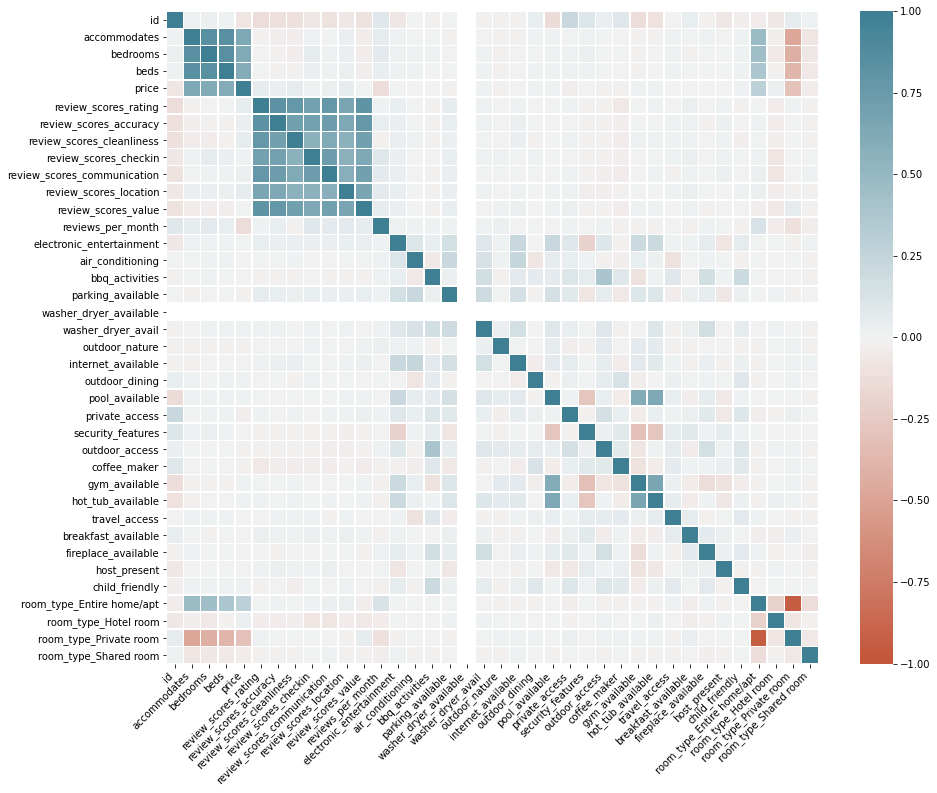

In [138]:
multi_collinearity_heatmap(transformed_dataframe)

### Areas of Multicollinearity:
<ul>
<li> As expected we have high multicolinearity between id, accommodates, the number of bedrooms, beds, and price. We will go ahead and drop the id, number of bedrooms column for our machine learning processes and keep the remaining even though the multicollinearity exits as these can be indicative of price. </li>

<li>We also see a high multicolinearity between the review_scores rating, accuracy, cleanliness, checkin, communication, location, and value. Since we reviewed these before, the most indicative of a relationship with price was the review_scores_rating so we will drop the other columns to help reduce the amount of multicolinearity between our variables. </li>

<li> Although there exists some multicolinearity between gym_available and hot_tub_available, I will keep these because usually listings with these amenities will be higher priced. </li>
    
 </ul>

In [140]:
transformed_dataframe.drop(['id','bedrooms', 'beds', 'review_scores_accuracy', 'review_scores_cleanliness',
                          'review_scores_communication','review_scores_checkin','review_scores_communication',
                          'review_scores_location', 'review_scores_value'], axis=1, inplace=True)

### Standardizing and Normalizing our data 
In order to reduce the overfitting we will log transform our data before performing our linear regression modeling. 

In [141]:
cols_to_transform = ['review_scores_rating', 'price', 'accommodates', 'reviews_per_month']

array([[<AxesSubplot:title={'center':'accommodates'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'review_scores_rating'}>,
        <AxesSubplot:title={'center':'reviews_per_month'}>]], dtype=object)

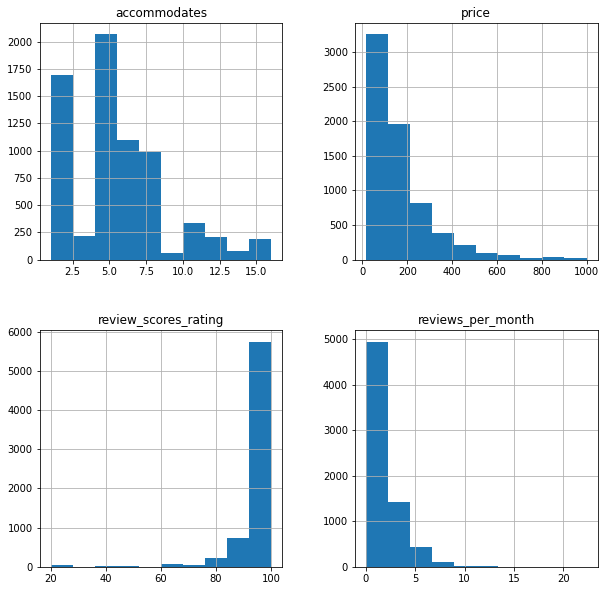

In [142]:
transformed_dataframe[cols_to_transform].hist(figsize=(10,10))

In [143]:
for col in cols_to_transform:
    transformed_dataframe[col] = transformed_dataframe[col].astype('float64').replace(0.0, 0.01) 
    transformed_dataframe[col] = np.log(transformed_dataframe[col])

array([[<AxesSubplot:title={'center':'accommodates'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'review_scores_rating'}>,
        <AxesSubplot:title={'center':'reviews_per_month'}>]], dtype=object)

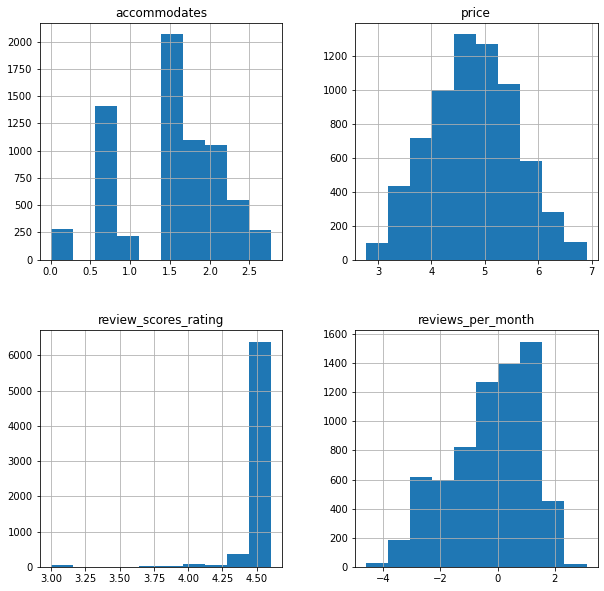

In [144]:
transformed_dataframe[cols_to_transform].hist(figsize=(10,10))

In [146]:
#Prior to begin our modeling we need to ensure that we clean our dataset
def clean_dataset(df):
    """
    INPUT
        df - a dataframe
    OUTPUT 
        a dataframe that no longer contains any nan values
    """
    #ensure we are working with a dataframe
    assert isinstance(df, pd.DataFrame),
    #Drop any nan values
    df.dropna(inplace=True)
    #Create a new dataframe where no nan indices are included
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    
    return df[indices_to_keep].astype(np.float64)

In [147]:
cleaned_dataframe = clean_dataset(transformed_dataframe)

# Data Modeling:
We completed our preprocessing and data analysis and now we can begin creating our linear regression machine learning model. 

In [149]:
# Separating X and y
X = transformed_dataframe.drop('price', axis=1)
y = transformed_dataframe.price

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        

#Predict using your model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using your model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.5895043258087054.  The rsquared on the test data was 0.5998609265521158.


In [166]:
y_array_test = np.array(list(y_test))
y_test_preds_array = np.array(y_test_preds)
y_test_error_array = np.array(list(y_test - y_test_preds))
pred_df = pd.DataFrame({'Actual': y_array_test.flatten(), 'Predicted': y_test_preds_array.flatten(), 'Error':  abs(y_test_error_array.flatten())})
pred_df

,Actual,Predicted,Error
0,4.219508,4.511230,0.291723
1,4.828314,5.186523,0.358210
2,5.488938,5.111328,0.377610
3,5.164786,5.319336,0.154550
4,3.465736,3.971680,0.505944
5,5.476464,5.183105,0.293358
6,3.891820,3.792480,0.099340
7,5.786897,5.068848,0.718050
8,5.075174,4.659668,0.415506
9,4.442651,4.045410,0.397241


## Conclusion:

The variance of our error is relatively spread out through the testing data, some values are high, and some are relatively low. The variance in the predictive test values could be accounted for anamolies in pricing data that was not cleaned out accurately. The questions of interest initially of our business analysis were:
1. What features of amnenties lead to variation of price per listing?
2. Which types of reviews determine price of a listing? Is it valuable to be a superhost?
3. Is price merely determined by the size of the listing (the # of bedrooms, the # of people the listing accomodates)?
4. Does the room type influence price?

## Answers:

1. It is challenging to understand, which features truly contribute to pricing. Although there is some indication that price may fluctuate with some amenities being present. It seems like the true determining factor of listings for this particular dataset involve the listings accommodation value. Let's take a look at this graph to see an example of this.

Text(0.5, 1.0, 'Listing Accommodates vs Price, Looking at Hot Tub Availability')

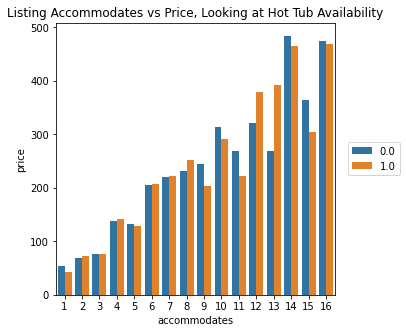

In [180]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x="accommodates", y="price", data=joined_dataframe, ci=False, hue='hot_tub_available')
# Put a legend to the right side
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
ax.set_title('Listing Accommodates vs Price, Looking at Hot Tub Availability')

Even when there was a hot tub available or not, the pricing remained relatively stable. It was to be expected that perhaps if the hot tub was missing them perhaps the price lising would be higher, but we can observe that in fact the price is sometimes lower. It would be interesting to further investigate each amentity to see if there is an indication of price, and perhaps create an additional learning model to see if our r-score could be improved. 

2. In the review and host exploration of data we noticed that the review that provided the most information about a listing's price was the overall review rating score. The other review information was not a clear delineation between a higher review leading to a higher price. On the other hand, when we explored the host information, we noticed that being a super host does not really affect a listings price, nor the hosts acceptance rate of a listing. 

3. We found that a listings accommodation number and size did contribute heavily to a higher price, but there were some variations with review scores, property types, and other features included that would not allow us to determine price by accommodation number alone.

4. A room type explored did not provide significant information about a listings price. However, we did see that the property type did show some information about price variations. It would be also great to see if removing the amenity information and leaving the property information would improve our learning model. 